# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Iqro Ilmi Pamungkas
- **Email:** iqro.c7rm@gmail.com
- **ID Dicoding:** iqroilmipamungkas

## Menentukan Pertanyaan Bisnis

*   Kategori produk apa dengan pembelian terbanyak dan kategori produk apa dengan pembelian paling sedikit?
*   Bagaimana tren penjualan bulanan selama periode tertentu?
*   Pelanggan mana yang merupakan pelanggan terbaik berdasarkan pesanan terakhirnya, frekuensi order, dan total nilai ordernya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from google.colab import drive

## Data Wrangling

### Gathering Data

Menghubungkan Google Colab ke Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Mengumpulkan semua data yang dibutuhkan

Melakukan Ekstraksi Dataset yang akan digunakan untuk analisis data

In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/proyek_analisis_data/Brazilian_E-Commerce_Public_Dataset.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/proyek_analisis_data/dataset')
zip_ref.close()

# Menentukan path direktori dataset
data_dir = '/content/drive/MyDrive/proyek_analisis_data/dataset/'

Memuat Tabel Customers

In [ ]:
customers_df=pd.read_csv(data_dir + 'olist_customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Memuat Tabel Products

In [ ]:
products_df= pd.read_csv(data_dir + 'olist_products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Memuat Tabel Orders

In [ ]:
orders_df= pd.read_csv(data_dir + 'olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Memuat Tabel Order Items

In [ ]:
items_df= pd.read_csv(data_dir + 'olist_order_items_dataset.csv')
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Memuat Tabel Order Payments

In [ ]:
payments_df= pd.read_csv(data_dir + 'olist_order_payments_dataset.csv')
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Memuat Tabel Order Reviews

In [ ]:
reviews_df= pd.read_csv(data_dir + 'olist_order_reviews_dataset.csv')
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Memuat Tabel Product Category

In [ ]:
category_df= pd.read_csv(data_dir + 'product_category_name_translation.csv')
category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

Setelah Mengumpulkan semua data yang dibutuhkan tahap selanjutnya menilai kualitas dari seluruh data yang akan digunakan

1) Menilai data customers_df

*   Memeriksa tipe data data dari tiap kolom yang terdapat dalam customers_df

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB




  *   Memeriksa duplikasi data pada customers_df






In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0




*   Memeriksa parameter statistik dari kolom numerik yang terdapat dalam customers_df




In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


2) Menilai data products_df



*  Memeriksa tipe data data dari tiap kolom yang terdapat dalam products_df



In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB




*   Menampilkan detail missing value pada products_df




In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64



*  Memeriksa duplikasi data pada products_df




In [ ]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0




*   Memeriksa parameter statistik dari kolom numerik yang terdapat dalam products_df




In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


3) Menilai data orders_df



*   Memeriksa tipe data data dari tiap kolom yang terdapat dalam orders_df




In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB




*   Menampilkan detail missing value pada orders_df



In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64



*   Memeriksa duplikasi data pada orders_df




In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0




*   Memeriksa parameter statistik dari kolom numerik yang terdapat dalam orders_df



In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


4) Menilai data items_df



*   Memeriksa tipe data data dari tiap kolom yang terdapat dalam items_df



In [ ]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB




*   Memeriksa duplikasi data pada items_df



In [ ]:
print("Jumlah duplikasi: ", items_df.duplicated().sum())

Jumlah duplikasi:  0




*   Memeriksa parameter statistik dari kolom numerik yang terdapat dalam items_df




In [ ]:
items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


5) Menilai data payments_df






*   Memeriksa tipe data data dari tiap kolom yang terdapat dalam payments_df




In [ ]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB




*   Memeriksa duplikasi data pada payments_df



In [ ]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

Jumlah duplikasi:  0




*   Memeriksa parameter statistik dari kolom numerik yang terdapat dalam payments_df



In [ ]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


6) Menilai data reviews_df



*   Memeriksa tipe data data dari tiap kolom yang terdapat dalam reviews_df



In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB




*   Menampilkan detail missing value pada reviews_df




In [ ]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64



*  Memeriksa duplikasi data pada reviews_df




In [ ]:
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())

Jumlah duplikasi:  0




*   Memeriksa parameter statistik dari kolom numerik yang terdapat dalam reviews_df



In [ ]:
reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


7) Menilai data category_df



*   Memeriksa tipe data data dari tiap kolom yang terdapat dalam category_df




In [ ]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB




*   Memeriksa duplikasi data pada category_df

In [ ]:
print("Jumlah duplikasi: ", category_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

1) Membersihkan data products_df



*   Menangani missing value pada data products_df
    
    Melihat data yang mengandung missing value menggunakan teknik filtering




In [ ]:
# Daftar kolom yang ingin diperiksa untuk missing values
columns_to_check = ['product_category_name', 'product_name_lenght', 'product_description_lenght',
                     'product_photos_qty', 'product_weight_g', 'product_length_cm',
                     'product_height_cm', 'product_width_cm']

# Menampilkan data yang mengandung missing values pada kolom-kolom tertentu
products_df[products_df[columns_to_check].isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0




*   Menghapus data yang mengandung missing value

    Karena terlalu banyak nilai null pada name lenght, description lenght, dan atribut size product dan saya tidak membutuhkan informasi tersebut, maka lebih baik untuk menghapusnya saja



In [ ]:
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

products_df.drop(product_drop_cols, axis= 1, inplace= True)

2) Membersihkan data orders_df



*   Menangani missing value pada data orders_df

    Melihat data yang mengandung missing value menggunakan teknik filtering




In [ ]:
orders_to_check = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']

orders_df[orders_df[orders_to_check].isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00




*   Karena baris data yang terdapat missing value tersebut masih mengandung banyak informasi penting sehingga data tidak dihapus







*   Menangani kesalahan tipe data pada data orders_df




In [ ]:
# Mengubah tipe data objek menjadi datetime
orders_dt_columns = ['order_purchase_timestamp',
                    'order_approved_at',
                    'order_delivered_carrier_date',
                    'order_delivered_customer_date',
                    'order_estimated_delivery_date']

for column in orders_dt_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


3) Membersihkan data items_df



*   Menangani kesalahan tipe data pada kolom shipping_limit_date



In [ ]:
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'])

In [ ]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


4) Membersihkan data reviews_df





*   Menangani missing value pada data reviews_df

    Mengubah nilai kolom review_comment_title dan review_comment_message yang memiliki nilai null dengan default string "No Tittle" dan "No Message"



In [ ]:
reviews_df["review_comment_title"].fillna("No Title", inplace=True)
reviews_df["review_comment_message"].fillna("No Message", inplace=True)

In [ ]:
reviews_df[reviews_df['review_comment_title'] == 'No Title']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Message,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Message,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Message,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,No Title,No Message,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,No Title,No Message,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,No Title,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,No Title,No Message,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
reviews_df[reviews_df['review_comment_message'] == 'No Message']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Message,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Message,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Message,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,No Title,No Message,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,No Title,No Message,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,No Title,No Message,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,No Title,No Message,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,No Title,No Message,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,No Title,No Message,2017-12-09 00:00:00,2017-12-11 20:06:42




*   Menangani kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp




In [ ]:
reviews_dt_columns = ["review_creation_date", "review_answer_timestamp"]

for column in reviews_dt_columns:
  reviews_df[column] = pd.to_datetime(reviews_df[column])

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


## Exploratory Data Analysis (EDA)

### Explore tabel products_df, category_df, dan items_df

Menggabungkan products_df dengan category_df

In [ ]:
df_products = pd.merge(
    left=products_df,
    right=category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
print('Jumlah baris dan kolom df_products:', df_products.shape)
df_products

Jumlah baris dan kolom df_products: (32951, 4)


,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares
...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,2.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,computers_accessories


Menggabungkan items_df dengan df_products

In [ ]:
# order_items = order_items.drop(columns = ['shipping_limit_date'])
order_item_products_df = pd.merge(
    left=items_df,
    right=df_products,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
print('Jumlah baris dan kolom order_item_products_df:', order_item_products_df.shape)
order_item_products_df

Jumlah baris dan kolom order_item_products_df: (112650, 10)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_photos_qty,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,2.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,2.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,1.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,1.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,3.0,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,1.0,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,1.0,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,1.0,computers_accessories


Kategori produk dengan pembelian terbanyak

In [ ]:
order_item_products_df.groupby(by="product_category_name_english").agg({
    "product_id": "count", # Menentukan jumlah pembelian
    "price": ["max", "min", "mean"]
}).sort_values(by=("product_id", "count"), ascending=False)

product_id    price                    
                                   count      max     min        mean
product_category_name_english                                        
bed_bath_table                     11115  1999.98    6.99   93.296327
health_beauty                       9670  3124.00    1.20  130.163531
sports_leisure                      8641  4059.00    4.50  114.344285
furniture_decor                     8334  1899.00    4.90   87.564494
computers_accessories               7827  3699.99    3.90  116.513903
...                                  ...      ...     ...         ...
arts_and_craftmanship                 24   289.49    9.80   75.583750
la_cuisine                            14   389.00   24.00  146.785000
cds_dvds_musicals                     14    65.00   45.00   52.142857
fashion_childrens_clothes              8   110.00   39.99   71.231250
security_and_services                  2   183.29  100.00  141.645000

[71 rows x 4 columns]

Berdasarkan data diatas dapat diketahui kategori produk bed_bath_table, health_beauty, sports_leisure, furniture_decor, computers_accessories menjadi kategori dengan pembelian terbanyak.

Kategori produk dengan jumlah pembelian paling sedikit

In [ ]:
order_item_products_df.groupby(by="product_category_name_english").agg({
    "product_id": "count", # Menentukan jumlah pembelian
    "price": ["max", "min", "mean"]
}).sort_values(by=("product_id", "count"), ascending=True)

product_id    price                    
                                   count      max     min        mean
product_category_name_english                                        
security_and_services                  2   183.29  100.00  141.645000
fashion_childrens_clothes              8   110.00   39.99   71.231250
la_cuisine                            14   389.00   24.00  146.785000
cds_dvds_musicals                     14    65.00   45.00   52.142857
arts_and_craftmanship                 24   289.49    9.80   75.583750
...                                  ...      ...     ...         ...
computers_accessories               7827  3699.99    3.90  116.513903
furniture_decor                     8334  1899.00    4.90   87.564494
sports_leisure                      8641  4059.00    4.50  114.344285
health_beauty                       9670  3124.00    1.20  130.163531
bed_bath_table                     11115  1999.98    6.99   93.296327

[71 rows x 4 columns]

Berdasarkan data diatas dapat diketahui bahwa security_and_services, fashion_childrens_clothes, la_cuisine, cds_dvds_musicals, arts_and_craftmanship merupakan kategori dengan jumlah pembelian paling sedikit.

### Explore tabel orders_df, customers_df, dan payments_df

Melakukan merge terhadap tabel orders_df dan customers_df

In [ ]:
order_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
print('Jumlah baris dan kolom orders_customer_df:', order_customers_df.shape)
order_customers_df

Jumlah baris dan kolom orders_customer_df: (99441, 12)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


Melakukan merge terhadap orders_customers_df dan payments_df

In [ ]:
payments = payments_df.drop(columns = ['payment_sequential','payment_installments'])

order_customers_df = pd.merge(
    left=order_customers_df,
    right=payments,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
print('Jumlah baris dan kolom orders_customers_df:', order_customers_df.shape)
order_customers_df

Jumlah baris dan kolom orders_customers_df: (103887, 14)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,credit_card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,credit_card,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,credit_card,85.08
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,credit_card,195.00
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,credit_card,271.01
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,credit_card,441.16


Kenaikan dan penurunan penjualan per bulan pada tahun 2017

In [ ]:
# Menambahkan kolom year dan month
order_customers_df['year'] = order_customers_df['order_purchase_timestamp'].dt.strftime('%Y')
order_customers_df['month'] = order_customers_df['order_purchase_timestamp'].dt.strftime('%m-%Y')
order_customers_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_type,payment_value,year,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,credit_card,18.12,2017,10-2017
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,voucher,2.00,2017,10-2017
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,voucher,18.59,2017,10-2017
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,boleto,141.46,2018,07-2018
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,credit_card,179.12,2018,08-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,credit_card,85.08,2017,03-2017
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,credit_card,195.00,2018,02-2018
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,credit_card,271.01,2017,08-2017
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,credit_card,441.16,2018,01-2018


Data penjualan per bulan tahun 2017

In [ ]:
order_2017_df = order_customers_df[order_customers_df['year'] == '2017']
order_perbulan_2017_df = order_2017_df .groupby(by="month", as_index=False).agg({
    "order_id": "nunique", # menghitung jumlah order
})

order_perbulan_2017_df.columns = ["Month", "Jumlah Order"]
print("Penjualan Per Bulan tahun 2017:")
order_perbulan_2017_df

Penjualan Per Bulan tahun 2017:


,Month,Jumlah Order
0,01-2017,800
1,02-2017,1780
2,03-2017,2682
3,04-2017,2404
4,05-2017,3700
5,06-2017,3245
6,07-2017,4026
7,08-2017,4331
8,09-2017,4285
9,10-2017,4631


Selisih jumlah order dari bulan ke bulan

In [ ]:
x = order_2017_df.groupby('month')['order_id'].nunique()
x_diff  = x.diff().fillna(0)
print(x_diff)

# Hasil penjualan per bulan dalam persentase
print("--------\nPersentase hasil penjualan per bulan : ")
x_percentage = x.pct_change().fillna(0) * 100
x_percentage

month
01-2017       0.0
02-2017     980.0
03-2017     902.0
04-2017    -278.0
05-2017    1296.0
06-2017    -455.0
07-2017     781.0
08-2017     305.0
09-2017     -46.0
10-2017     346.0
11-2017    2913.0
12-2017   -1871.0
Name: order_id, dtype: float64
--------
Persentase hasil penjualan per bulan : 


month
01-2017      0.000000
02-2017    122.500000
03-2017     50.674157
04-2017    -10.365399
05-2017     53.910150
06-2017    -12.297297
07-2017     24.067797
08-2017      7.575758
09-2017     -1.062110
10-2017      8.074679
11-2017     62.902181
12-2017    -24.801166
Name: order_id, dtype: float64

### Explore tabel order_item_products_df dan order_customers_df

In [ ]:
all_df=pd.merge(
    left=order_customers_df,
    right=order_item_products_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_photos_qty,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,10-2017,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,4.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,10-2017,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,4.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,10-2017,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,4.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,07-2018,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,1.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,08-2018,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,1.0,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,02-2018,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,bebes,4.0,baby
118430,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,08-2017,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,eletrodomesticos_2,2.0,home_appliances_2
118431,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,01-2018,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,informatica_acessorios,1.0,computers_accessories
118432,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,01-2018,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,informatica_acessorios,1.0,computers_accessories


Menambah kolom baru bernama total_order_value hasil penjumlahan kolom price dan freight_value diletakkan pada index setelah kedua kolom tersebut

In [ ]:
all_df.insert(22, "total_order_value", all_df.price + all_df.freight_value)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value,product_category_name,product_photos_qty,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,utilidades_domesticas,4.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,utilidades_domesticas,4.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,utilidades_domesticas,4.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46,perfumaria,1.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,179.12,automotivo,1.0,auto


In [ ]:
all_df.describe()

,customer_zip_code_prefix,payment_value,order_item_id,price,freight_value,total_order_value,product_photos_qty
count,118434.000000,118431.000000,117604.000000,117604.000000,117604.000000,117604.000000,115906.000000
mean,35034.264392,172.849395,1.195920,120.822849,20.045551,140.868400,2.207849
std,29819.290218,268.259831,0.697721,184.477367,15.861351,191.616461,1.719519
min,1003.000000,0.000000,1.000000,0.850000,0.000000,6.080000,1.000000
25%,11310.000000,60.860000,1.000000,39.900000,13.080000,55.270000,1.000000
50%,24240.000000,108.200000,1.000000,74.900000,16.290000,92.115000,1.000000
75%,58464.500000,189.245000,1.000000,134.900000,21.190000,157.780000,3.000000
max,99990.000000,13664.080000,21.000000,6735.000000,409.680000,6929.310000,20.000000


### RFM Analysis

Membuat dataset baru bernama rfm_df yang akan digunakan untuk melakukan analisis RFM

In [ ]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg(
    max_order_date = ("order_purchase_timestamp", "max"), # mengambil tanggal order terakhir
    frequency = ("order_id", "nunique"), # menghitung jumlah order
    monetary = ("total_order_value", "sum") # menghitung total jumlah uang untuk pemesanan
    )

rfm_df['max_order_date'] = rfm_df['max_order_date'].dt.date #mengubah menjadi format tanggal
recent_order_date = all_df['order_purchase_timestamp'].dt.date.max() #memilih hari terakhir dalam kolom order_purchase_timestamp
rfm_df.insert(1,'recency', rfm_df['max_order_date'].apply(lambda x: (recent_order_date - x).days)) #mencari selisih kapan terakhir pelanggan bertransaksi
rfm_df.drop('max_order_date', axis=1, inplace=True) #menghapus kolom yang tidak dibutuhkan
rfm_df.head(10)

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,586,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89
5,0004bd2a26a76fe21f786e4fbd80607f,195,1,166.98
6,00050ab1314c0e55a6ca13cf7181fecf,180,1,35.38
7,00053a61a98854899e70ed204dd4bafe,231,1,419.18
8,0005e1862207bf6ccc02e4228effd9a0,592,1,150.12
9,0005ef4cd20d2893f0d9fbd94d3c0d97,219,1,129.76


In [ ]:
rfm_df.describe()

,recency,frequency,monetary
count,96096.000000,96096.000000,96096.000000
mean,288.108797,1.034809,172.397262
std,153.417869,0.214384,262.564677
min,0.000000,1.000000,0.000000
25%,164.000000,1.000000,63.270000
50%,269.000000,1.000000,109.665000
75%,397.000000,1.000000,187.630000
max,773.000000,17.000000,13664.080000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa dengan pembelian terbanyak dan kategori produk apa dengan pembelian paling sedikit?

In [ ]:
purchase_category_df = order_item_products_df.groupby(by="product_category_name_english")["product_id"].count().reset_index() # Menentukan jumlah pembelian
purchase_category_df = purchase_category_df.rename(columns={"product_category_name_english": "category",
                                                            "product_id": "orders"})


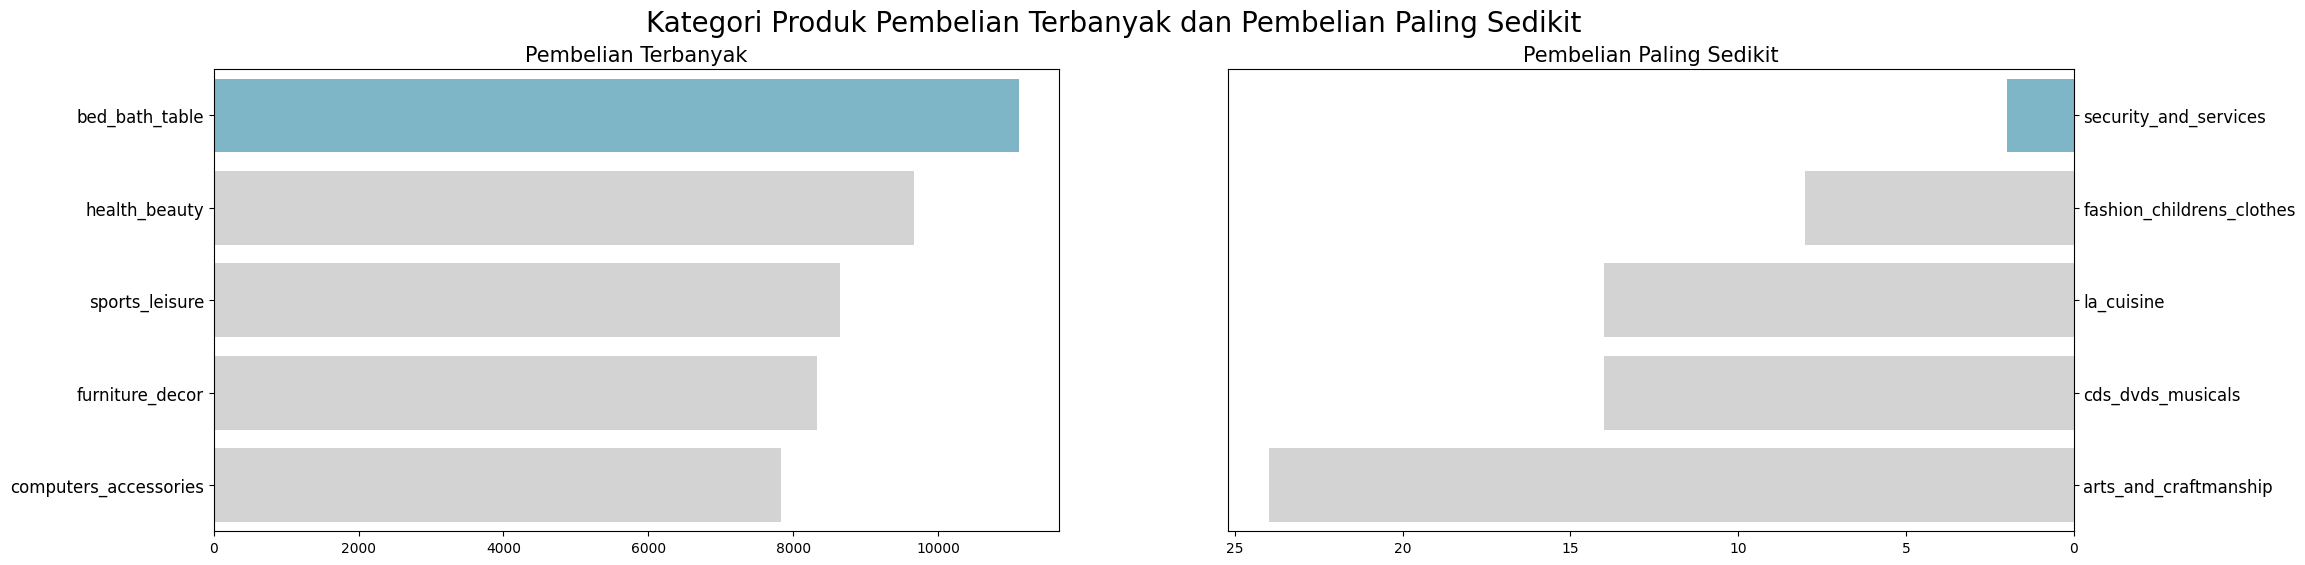

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="orders", y="category", data=purchase_category_df.sort_values(by="orders", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Pembelian Terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="orders", y="category", data=purchase_category_df.sort_values(by="orders", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Pembelian Paling Sedikit", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Kategori Produk Pembelian Terbanyak dan Pembelian Paling Sedikit", fontsize=20)
plt.show()

Berdasarkan kedua grafik diatas, dapat diketahui bahwa bed_bath_table merupakan kategori dengan pembelian terbanyak sedangkan security dan service adalah ketogori dengan pembelian paling sedikit

### Pertanyaan 2: Bagaimana tren penjualan bulanan selama periode tertentu?

Tren penjualan per bulan periode januari - desember pada tahun 2017

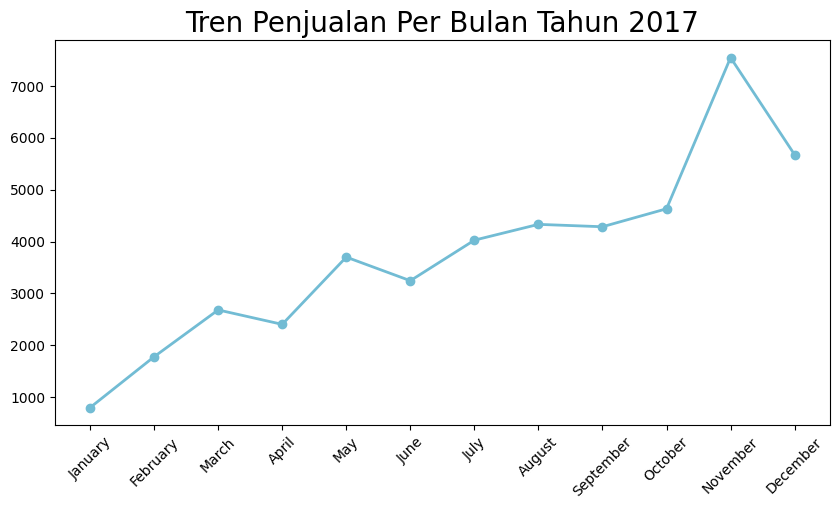

In [ ]:
orders_2017_df =  order_customers_df[order_customers_df['year'] == '2017']
monthly_orders_df = orders_2017_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Tren Penjualan Per Bulan Tahun 2017", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

Jumlah order per bulan pada tahun 2017 mengalami perkembangan yang baik dengan nilai tertingginya terjadi pada bulan November

### Pertanyaan 3: Pelanggan mana yang merupakan pelanggan terbaik berdasarkan pesanan terakhirnya, frekuensi order, dan total nilai ordernya?

In [ ]:
rfm_df.sort_values(by='monetary', ascending=False).head(10)

,customer_unique_id,recency,frequency,monetary
3826,0a0a92112bd4c708ca5fde585afaa872,383,1,13664.08
52175,8af7ac63b2efbcbd88e5b11505e8098a,545,1,13281.71
73922,c4b224d2c784bae11ae98b6ae9f2454c,506,1,11111.40
50192,85963fd37bfd387aa6d915d8a1065486,245,1,10553.28
71593,be74c431147c32ab2d7c7cef5e4a995f,160,1,10055.22
89420,edf81e1f3070b9dac83ec83dacdbb9bc,547,1,8389.52
33244,58483a1c055dfb600f57c5b867174542,134,1,8068.88
6132,1033eef37a760a832f9b2332ce23fdc5,406,1,8030.46
81962,da122df9eeddfedc1dc1f5349a1a690c,564,2,7571.63
18139,301d1ce5a76b7e1bc47e5115bf5eb6ba,113,1,7413.70


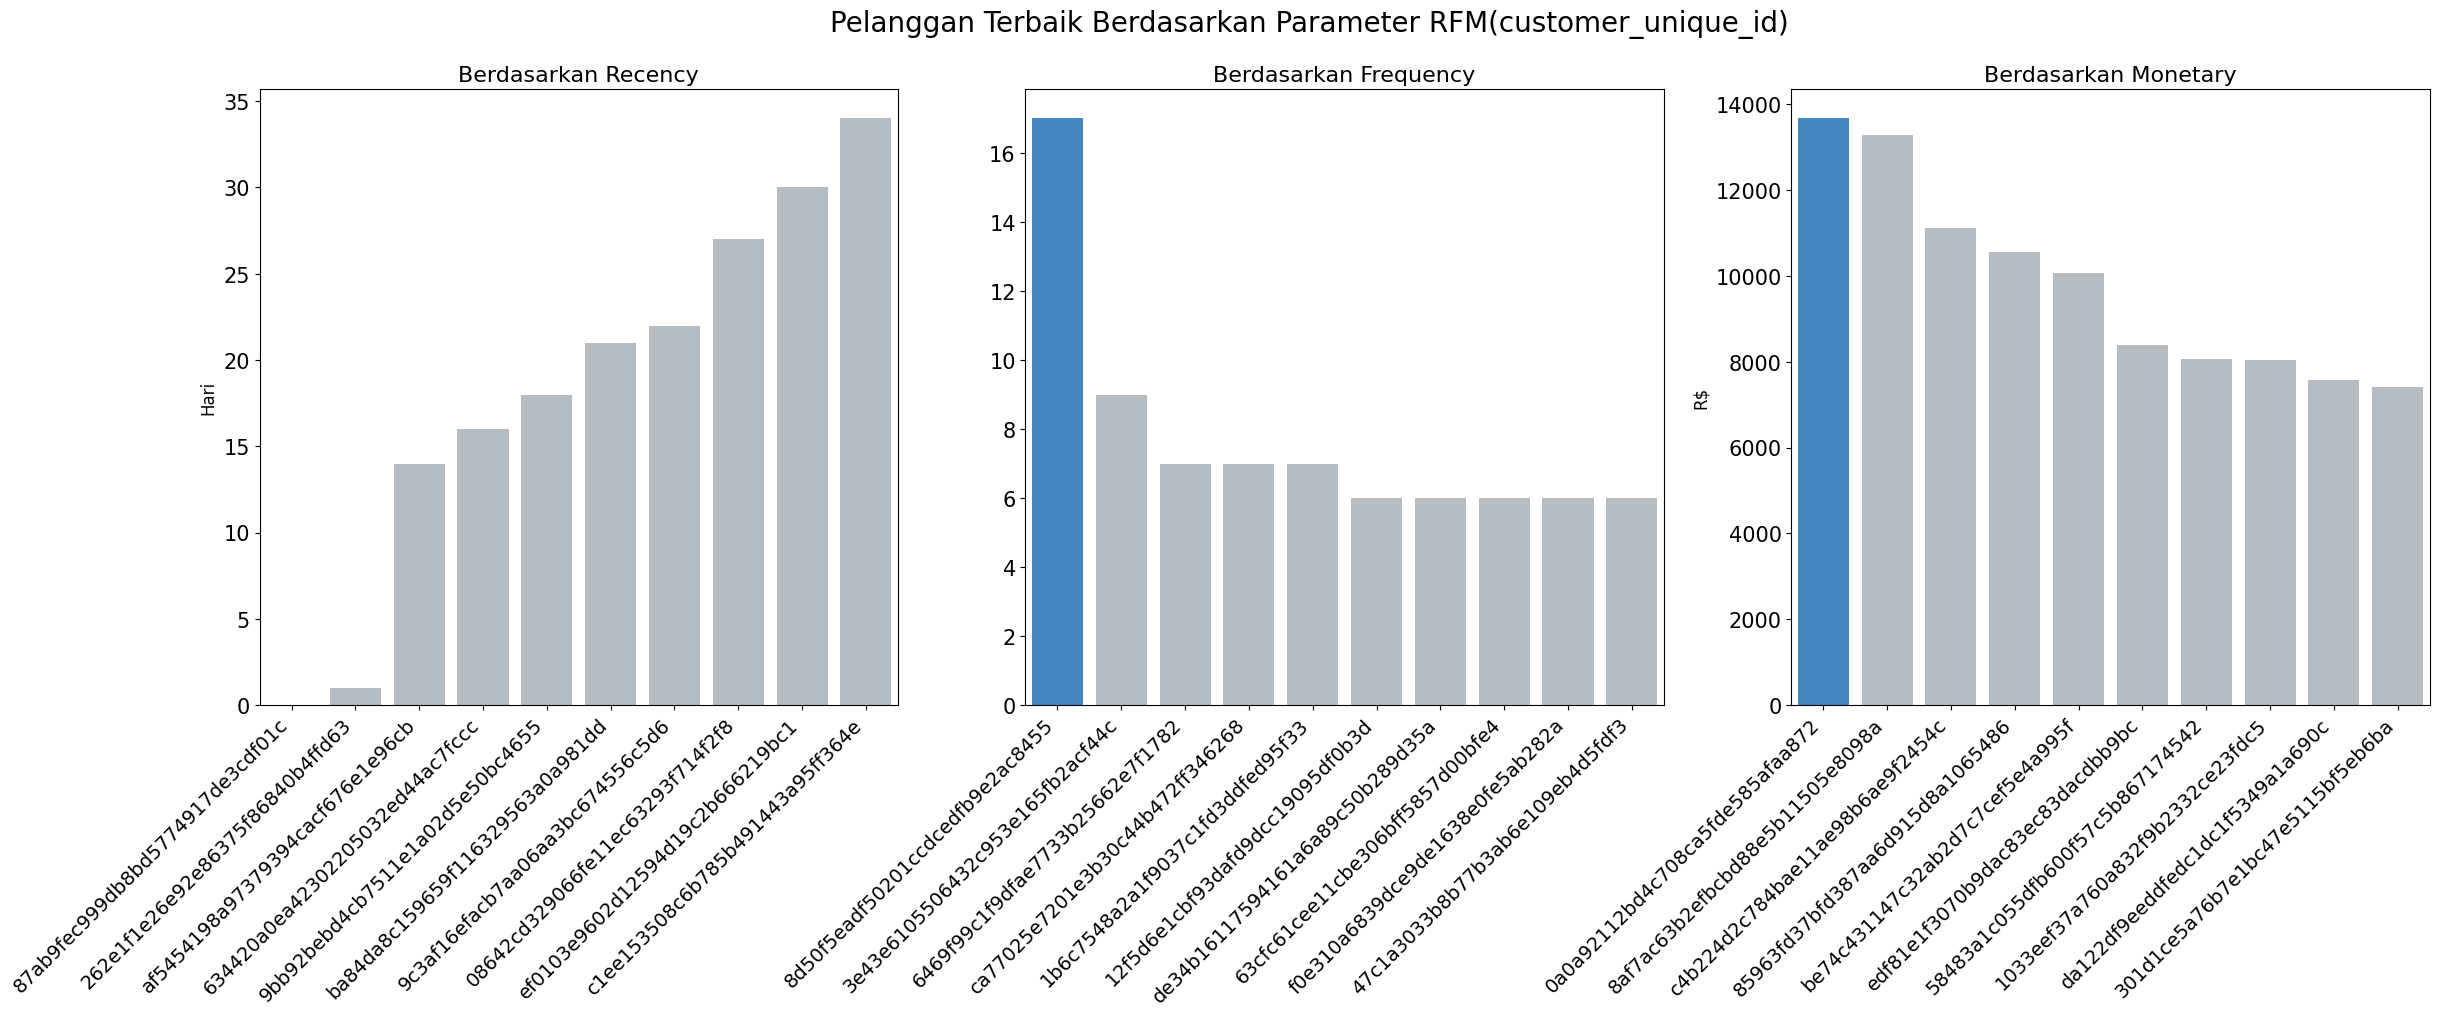

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(28, 8))
colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="customer_unique_id", y="recency", data= rfm_df.sort_values(by='recency', ascending=True).head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel('Hari', fontsize=12)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Recency", loc="center", fontsize=16)
ax[0].tick_params(axis ='y', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

sns.barplot(x="customer_unique_id", y="frequency", data= rfm_df.sort_values(by='frequency', ascending=False).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=16)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

sns.barplot(x="customer_unique_id", y="monetary", data= rfm_df.sort_values(by='monetary', ascending=False).head(10), palette=colors, ax=ax[2])
ax[2].set_ylabel('R$', fontsize=12)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=16)
ax[2].tick_params(axis ='y', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

plt.suptitle("Pelanggan Terbaik Berdasarkan Parameter RFM(customer_unique_id)", fontsize=20)
plt.show()

Berdasarkan data diatas dapat diketahui bahwa:

* Pelanggan terbaik berdasarkan hari terakhir pembelian (recency) yaitu pelanggan dengan ID 87ab9fec999db8bd5774917de3cdf01c
* Pelanggan terbaik berdasarkan seberapa seringnya melakukan pembelian (frequency) yaitu pelanggan dengan ID 8d50f5eadf50201ccdcedfb9e2ac8455
* Pelanggan terbaik berdasarkann total nilai order (monetary) yaitu pelanggan dengan ID 0a0a92112bd4c708ca5fde585afaa872

## Conclusion

1. Kategori produk apa dengan pembelian terbanyak dan kategori produk apa dengan pembelian paling sedikit?
>Kategori dengan pembelian terbanyak adalah bed_bath_table
>ketogori dengan pembelian paling sedikit adalah security dan service

2. Bagaimana tren penjualan bulanan selama periode tertentu?
> Jumlah order per bulan periode bulan januari - desember tahun 2017 mengalami perkembangan yang baik dengan nilai tertingginya terjadi pada bulan November

3. Pelanggan mana yang merupakan pelanggan terbaik berdasarkan pesanan terakhirnya, frekuensi order, dan total nilai ordernya?
>* Pelanggan terbaik berdasarkan hari terakhir pembelian (recency) adalah pelanggan dengan ID 87ab9fec999db8bd5774917de3cdf01c
>* Pelanggan terbaik berdasarkan seberapa seringnya melakukan pembelian (frequency) adalah pelanggan dengan ID 8d50f5eadf50201ccdcedfb9e2ac8455
>* Pelanggan terbaik berdasarkann total nilai order (monetary) adalah pelanggan dengan ID 0a0a92112bd4c708ca5fde585afaa872
















In [100]:
#Menyimpan berkas data yang telah dibersihkan
all_df.to_csv('all_data.csv', index=False)